In [39]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
import os
import skimage
import cv2

In [40]:
os.environ["KMP_DUPLICATE_LIB_OK"]='TRUE'
import torchxrayvision as xrv

In [41]:
ae = xrv.autoencoders.ResNetAE(weights="101-elastic")

In [42]:
img = skimage.io.imread(r"datasets\converted\051132a778e61a86eb147c7c6f564dfe.png")
img = xrv.datasets.normalize(img, 255)  

# Check that images are 2D arrays
if len(img.shape) > 2:
    img = img[:, :, 0]
if len(img.shape) < 2:
    print("error, dimension lower than 2 for image")

# Add color channel
img = img[None, :, :]                    

transform = torchvision.transforms.Compose([xrv.datasets.XRayCenterCrop(),
                                            xrv.datasets.XRayResizer(224)])
img = transform(img)
img = torch.from_numpy(img).unsqueeze(0)
transformed = img.numpy()[0][0]

Setting XRayResizer engine to cv2 could increase performance.


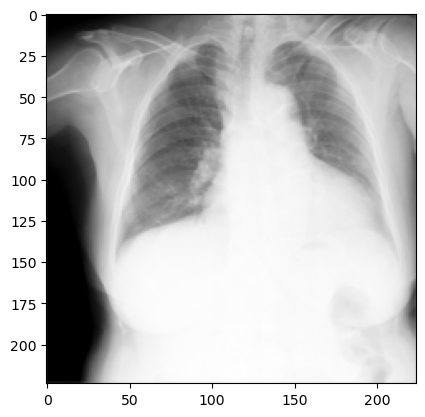

In [43]:
plt.imsave("transformed.png", transformed, cmap="Greys_r")
original = plt.imread("transformed.png")
plt.imshow(original);

In [44]:
out = ae(img)

In [45]:
img_r = out['out'].detach().numpy()

In [46]:
plt.imsave("image.png", img_r[0][0], cmap="Greys_r")
output = plt.imread("image.png")

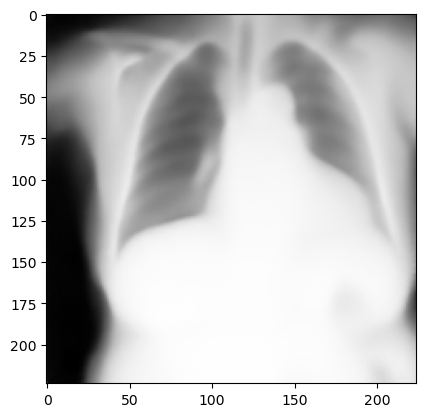

In [47]:
plt.imshow(output, cmap="Greys_r");

In [48]:
model = xrv.models.DenseNet(weights="all")


In [49]:
img.shape

torch.Size([1, 1, 224, 224])

In [50]:
print(original.shape)
new = torch.from_numpy(original).unsqueeze(0)
new.shape

(224, 224, 4)


torch.Size([1, 224, 224, 4])

In [51]:
with torch.no_grad():
    out = model(img)

In [52]:
dict(zip(model.pathologies,out[0].detach().numpy()))

{'Atelectasis': 0.6109736,
 'Consolidation': 0.51081616,
 'Infiltration': 0.5230876,
 'Pneumothorax': 0.29075325,
 'Edema': 0.506075,
 'Emphysema': 0.50191104,
 'Fibrosis': 0.5266212,
 'Effusion': 0.56997186,
 'Pneumonia': 0.13524535,
 'Pleural_Thickening': 0.50502455,
 'Cardiomegaly': 0.8184716,
 'Nodule': 0.5067659,
 'Mass': 0.5058897,
 'Hernia': 0.5315641,
 'Lung Lesion': 0.17387335,
 'Fracture': 0.5132898,
 'Lung Opacity': 0.605765,
 'Enlarged Cardiomediastinum': 0.5174685}

In [53]:
model = xrv.baseline_models.chestx_det.PSPNet()

img = skimage.io.imread(r"datasets\converted\051132a778e61a86eb147c7c6f564dfe.png")
img = xrv.datasets.normalize(img, 255) # convert 8-bit image to [-1024, 1024] range
img = img[None, ...] # Make single color channel

transform = torchvision.transforms.Compose([xrv.datasets.XRayCenterCrop(),xrv.datasets.XRayResizer(512)])

img = transform(img)
img = torch.from_numpy(img)

Setting XRayResizer engine to cv2 could increase performance.


In [54]:
with torch.no_grad():
    pred = model(img)

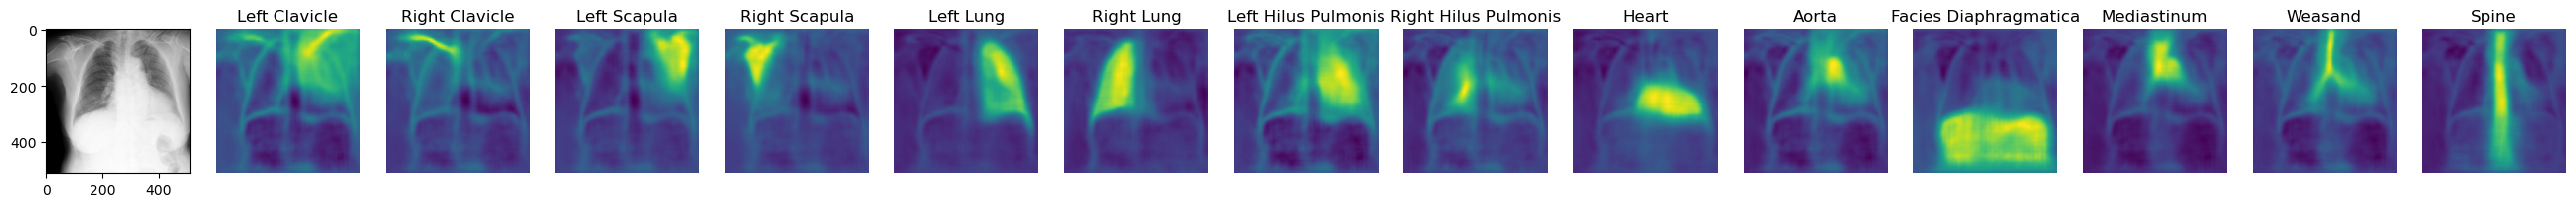

In [55]:
plt.figure(figsize = (26,5))
plt.subplot(1, len(model.targets) + 1, 1)
plt.imshow(img[0], cmap='gray')
for i in range(len(model.targets)):
    plt.subplot(1, len(model.targets) + 1, i+2)
    plt.imshow(pred[0, i])
    plt.title(model.targets[i])
    plt.axis('off')
plt.tight_layout()

In [56]:
pred = 1 / (1 + np.exp(-pred))  # sigmoid
pred[pred < 0.5] = 0
pred[pred > 0.5] = 1

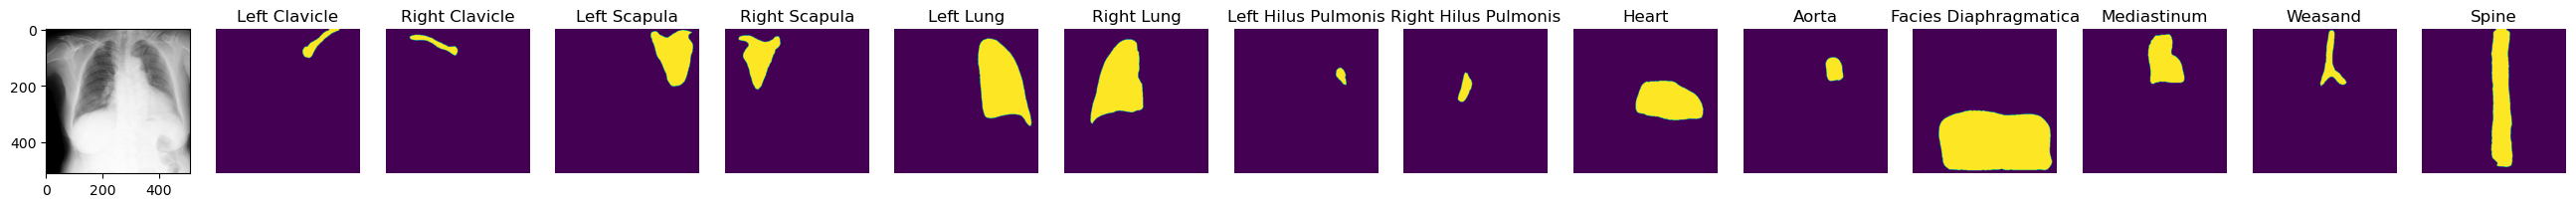

In [57]:
plt.figure(figsize = (26,5))
plt.subplot(1, len(model.targets) + 1, 1)
plt.imshow(img[0], cmap='gray')
for i in range(len(model.targets)):
    plt.subplot(1, len(model.targets) + 1, i+2)
    plt.imshow(pred[0, i])
    plt.title(model.targets[i])
    plt.axis('off')
plt.tight_layout()